# Predict Loan Status

#### by Brin Xu

## CRISP-DM Process

**Business Understanding**: From loan data from Prosper, I seek to get a better knowledge of how to predict loan status. Three business aspect questions were asked before diving into the dataset: How do homeownership and employment status predict Loan amount?
How do homeownership and employment status predict borrowers’ APR?
How does Loan Status vary by homeownership status and employment status?

**Data Understanding**：Prosper loan data has 113,937 loans with 81 variables on each loan status, borrowers' income, and many others. Datasets were investigated before any preprocessing.

**Prepare Data**: Including data cleaning and handling missing values. The procedure was recorded in the preliminary wrangling part. 

**Data Modeling**: Univariate, bivariate, and multivariate approaches were conducted step by step to understand the relationships among key variables. 

**Result Evaluation**: Result and discussion are published in https://medium.com/@brinxu1/predict-loan-status-9784e36a5736


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

In [2]:
# read the data into a pandas framework
df = pd.read_csv('prosperLoanData.csv')
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
43934,DCD73575172360943DF01A7,735497,2013-03-24 09:07:11.010000000,NaN,36,Current,NaN,0.25013,0.2124,0.2024,...,-18.17,0.0,0.00,0.00,0.0,1.0,0,0,0.0,32
61681,DD023564571550143532E5B,673538,2012-11-20 13:22:33.207000000,NaN,60,Current,NaN,0.25133,0.2262,0.2162,...,-52.40,0.0,0.00,0.00,0.0,1.0,0,0,0.0,87
28716,2EC7352516465363912C7DF,526279,2011-09-10 07:14:50.520000000,NaN,36,Current,NaN,0.35643,0.3199,0.3099,...,-101.05,0.0,0.00,0.00,0.0,1.0,0,0,0.0,90
57461,18793557538902259C7B802,638052,2012-09-12 06:29:41.210000000,NaN,60,Completed,2012-11-14 00:00:00,0.26887,0.2433,0.2333,...,-23.73,0.0,0.00,0.00,0.0,1.0,0,0,0.0,79
88743,BF1A3461006353385E5AAF5,422116,2009-08-29 09:07:19.413000000,NaN,36,Completed,2011-07-11 00:00:00,0.14516,0.1238,0.1138,...,-68.09,0.0,0.00,0.00,0.0,1.0,0,0,0.0,145
55796,BC7A360304983293529FDEA,1191419,2014-02-13 12:31:15.363000000,NaN,36,Current,NaN,0.22812,0.1905,0.1805,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
62053,A4A9342485364959182D2C4,356261,2008-06-24 10:58:10.030000000,A,36,Defaulted,2010-08-01 00:00:00,0.13915,0.1250,0.1150,...,-127.93,0.0,4908.29,4908.29,0.0,1.0,0,0,0.0,245
66988,864E3596891144490331E9E,1072482,2013-12-04 20:22:23.323000000,NaN,36,Current,NaN,0.27776,0.2394,0.2294,...,-8.42,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
67370,D11D360166508174251949D,1159415,2014-01-24 14:00:37.897000000,NaN,60,Current,NaN,0.18913,0.1655,0.1555,...,-21.23,0.0,0.00,0.00,0.0,1.0,0,0,0.0,54
67404,B7043403342702429AD5100,222480,2007-10-28 15:56:54.413000000,D,36,Completed,2010-11-02 00:00:00,0.19991,0.1926,0.1826,...,-50.63,0.0,0.00,0.00,0.0,1.0,0,0,0.0,21


In [3]:
# summarize the data and check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Although missing values appear in many columns, I only need to handle those in my interested varaibles. 

In [4]:
# subsetting the data based on my analysis interest 
cols = ['LoanStatus', 
        'BorrowerAPR' , 
        'BorrowerRate' ,            
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'IncomeRange',
        'IsBorrowerHomeowner', 
        'LoanOriginalAmount' ,]

In [5]:
# define sub dataset including my interest variables
df_sub = df[cols]

In [6]:
# check the data
df_sub.describe()

,BorrowerAPR,BorrowerRate,ListingCategory (numeric),LoanOriginalAmount
count,113912.000000,113937.000000,113937.000000,113937.00000
mean,0.218828,0.192764,2.774209,8337.01385
std,0.080364,0.074818,3.996797,6245.80058
min,0.006530,0.000000,0.000000,1000.00000
25%,0.156290,0.134000,1.000000,4000.00000
50%,0.209760,0.184000,1.000000,6500.00000
75%,0.283810,0.250000,3.000000,12000.00000
max,0.512290,0.497500,20.000000,35000.00000


In [7]:
# check column name, types, count
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   BorrowerAPR                113912 non-null  float64
 2   BorrowerRate               113937 non-null  float64
 3   ListingCategory (numeric)  113937 non-null  int64  
 4   EmploymentStatus           111682 non-null  object 
 5   IncomeRange                113937 non-null  object 
 6   IsBorrowerHomeowner        113937 non-null  bool   
 7   LoanOriginalAmount         113937 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 6.2+ MB


In [8]:
# Check missing values
pd.set_option('display.max_rows', None)
df_sub.isnull().sum()

LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
ListingCategory (numeric)       0
EmploymentStatus             2255
IncomeRange                     0
IsBorrowerHomeowner             0
LoanOriginalAmount              0
dtype: int64

EmploymentStatus has 2255 missing values, accounting for roughly 2% of the rows. BorrowerAPR has only 25. Due to the small percentage, I feel comfortable dropping the missings. 

In [9]:
# drop rows with any missing values
df_sub = df_sub.dropna(how='any', subset=['BorrowerAPR', 'EmploymentStatus'])

In [10]:
# test
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111682 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 111682 non-null  object 
 1   BorrowerAPR                111682 non-null  float64
 2   BorrowerRate               111682 non-null  float64
 3   ListingCategory (numeric)  111682 non-null  int64  
 4   EmploymentStatus           111682 non-null  object 
 5   IncomeRange                111682 non-null  object 
 6   IsBorrowerHomeowner        111682 non-null  bool   
 7   LoanOriginalAmount         111682 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 6.9+ MB


### What is the structure of your dataset?

- The data set has 113,937 loans with 81 variables on each loan status, borrowers' income, and many others. 

### What is/are the main feature(s) of interest in your dataset?

- I'm most interested in figuring out what features are best for predicting the Loan outcome in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- I expect that employment status, whether a homeowner would have impacts on loan outcomes. Namely, being employed are more likely to get a larger amount of loan and lower borrower APR. Likewise, those who have a home are more likely to get a larger amount of loan and lower borrower APR. 

## Univariate Exploration

1. Categorical Variables

Text(0.5, 1.0, 'Loan Status of all Borrowers')

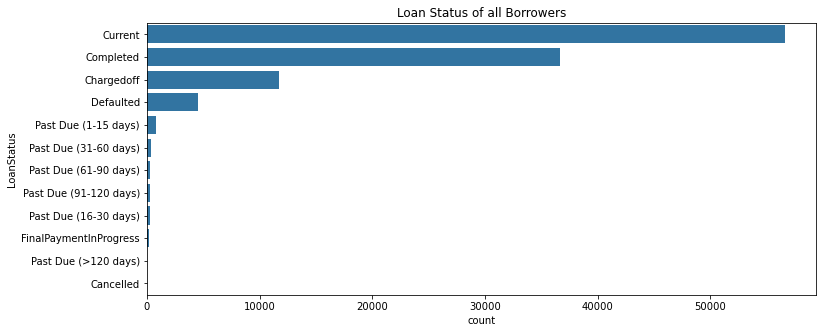

In [11]:
# look at the distribution of loan status
plt.figure(figsize = [12, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, y = 'LoanStatus', color = base_color,
             order = df_sub['LoanStatus'].value_counts().index)
plt.title("Loan Status of all Borrowers")

Current loans account for the majority of the loans, followed by completed, charged off, and defaulted. 

In [12]:
# Converting Listing Category values from numeric to appropriate labels

df['ListingCategory (numeric)'] = df_sub['ListingCategory (numeric)'].replace({
0: 'Not Available',
1: 'Debt Consolidation',
2: 'Home Improvement',
3: 'Business',
4: 'Personal Loan',
5: 'Student Use',
6: 'Auto',
7: 'Other',
8: 'Baby&Adoption',
9: 'Boat',
10: 'Cosmetic Procedure',
11: 'Engagement Ring',
12: 'Green Loans',
13: 'Household Expenses',
14: 'Large Purchases',
15: 'Medical/Dental',
16: 'Motorcycle',
17: 'RV',
18: 'Taxes',
19: 'Vacation',
20: 'Wedding Loans'})

Text(0.5, 1.0, 'Listing Categories')

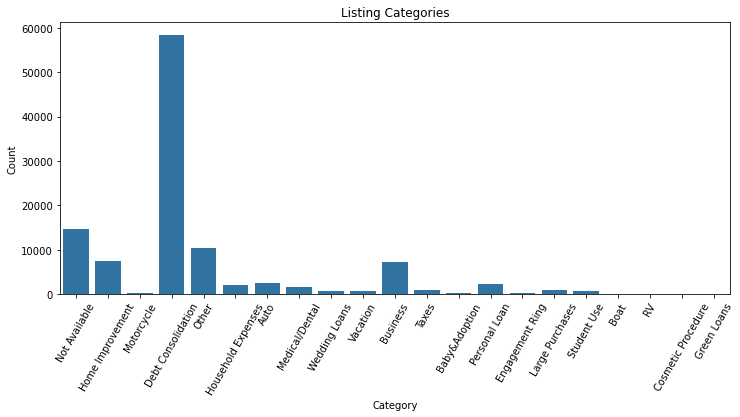

In [13]:
# Look at the distribution of listing category
plt.figure(figsize = [12, 5]) 
sb.countplot(data = df, x = 'ListingCategory (numeric)', color = base_color)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation = 60)
plt.title('Listing Categories')

Most loans are for motorcycles, home improvement, and business. 

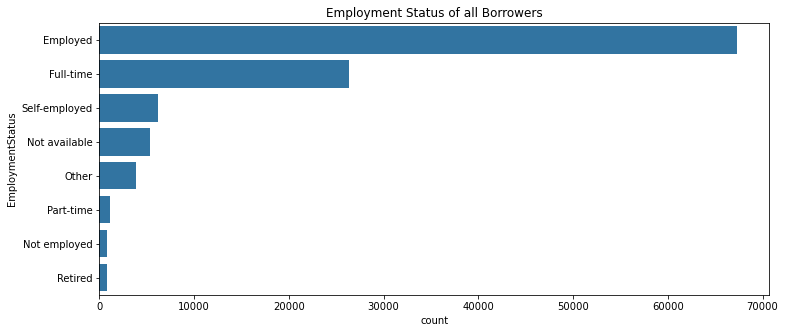

In [14]:
# look at the distribution of employ status
plt.figure(figsize = [12, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, y = 'EmploymentStatus', color = base_color,
             order = df_sub['EmploymentStatus'].value_counts().index)
plt.title("Employment Status of all Borrowers");

Most borrowers are either full-time or part-time employed. 

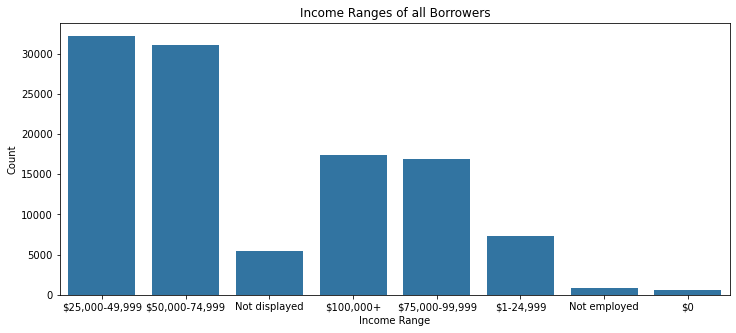

In [15]:
# look at the distribution of income range
plt.figure(figsize = [12, 5]) 
df_sub = df_sub[df_sub['IncomeRange'].isnull() == False]
sb.countplot(data = df_sub, x = 'IncomeRange', color = base_color)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Ranges of all Borrowers');

Most borrowers earn between 25K to 75K. 

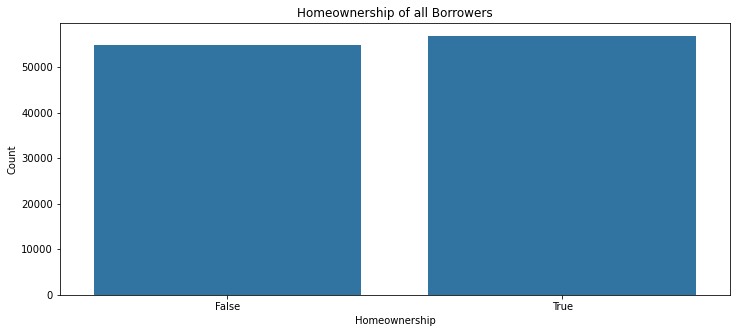

In [16]:
# look at the distribution of homeownership
plt.figure(figsize = [12, 5]) 
df_sub = df_sub[df_sub['IsBorrowerHomeowner'].isnull() == False]
sb.countplot(data = df_sub, x = 'IsBorrowerHomeowner', color = base_color)
plt.xlabel('Homeownership')
plt.ylabel('Count')
plt.title('Homeownership of all Borrowers');

About half of the borrowers are home owners. 

2. Numeric Variables

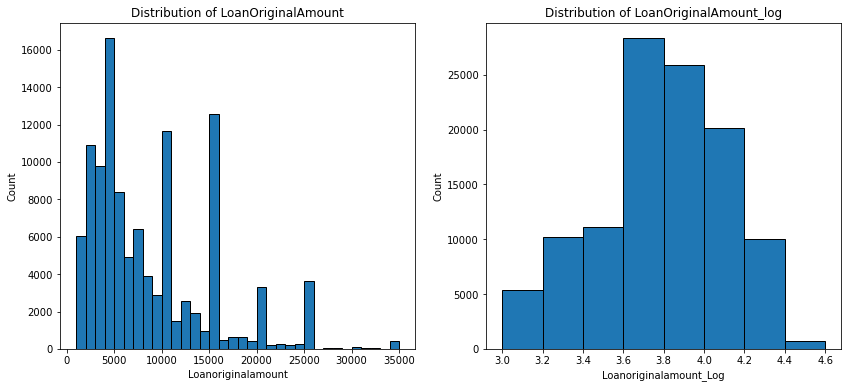

In [17]:
# build a function to reduce repetitive code
log_data = np.log10(df_sub['LoanOriginalAmount']) # direct data transform

df_sub['LoanOriginalAmount_log'] = np.log10(df_sub['LoanOriginalAmount'])

def splitString(string): 
    
    '''
    splitString() - split a string, adding a space before an uppercase letter
    
    '''
    # loop through each character
    # if a character is lowercase, leave it as it is
    # otherwise, put a space before it
    
    return ''.join([x if x.islower() else f"{x}" for x in string])
                    
def myHisPlot(df,x_vars,binsize,figsize=[14,6]):
    bin_edges = np.arange(df[x_vars].min(), df[x_vars].max()+binsize, binsize)
    df_sub[x_vars].hist(bins=bin_edges,grid=False, edgecolor='black', figsize=figsize);
    x_vars = splitString(x_vars)                
    plt.xlabel(x_vars.title())
    plt.ylabel('Count')
    plt.title(f'Distribution of {x_vars}')

# Look at the distribution of the Original Loan Amounts
plt.figure(figsize = [12, 5])
              
# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
myHisPlot(df_sub, 'LoanOriginalAmount', 1000)

# left histogram: data plotted in natural units
plt.subplot(1, 2, 2)
myHisPlot(df_sub, 'LoanOriginalAmount_log', 0.2)

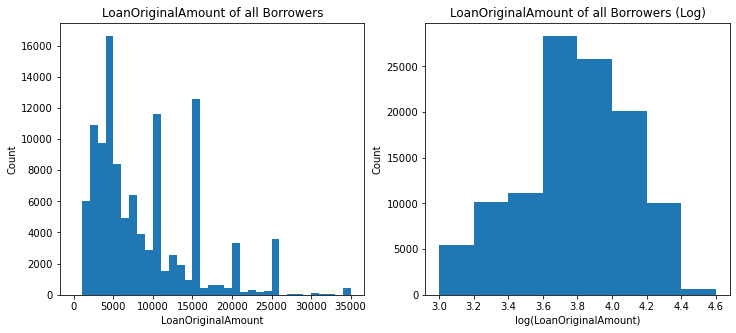

In [18]:
# Look at the distribution of the Original Loan Amounts
plt.figure(figsize = [12, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df_sub['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df_sub, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(df_sub['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log)");

df_sub['LoanOriginalAmount_log'] = np.log10(df_sub['LoanOriginalAmount'])

The loan amount appears to be right-skewed. After log transforming, it becomes a normal distribution. 

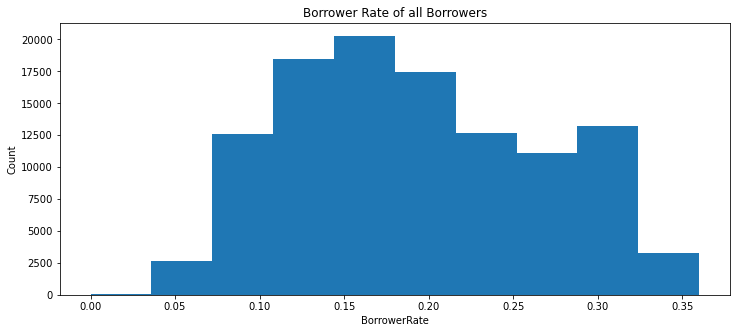

In [19]:
# Look at the distribution of borrower rate
plt.figure(figsize = [12, 5]) 
plt.hist(data = df_sub, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("Borrower Rate of all Borrowers");

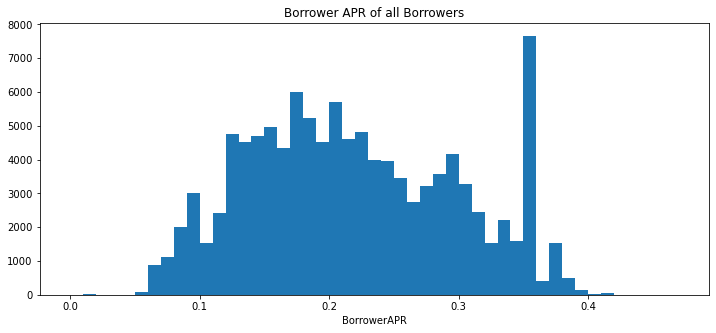

In [20]:
# Look at the distribution of borrowers'APR

plt.figure(figsize = [12, 5]) 
bins = np.arange(0, df_sub.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = df_sub, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.title("Borrower APR of all Borrowers");

Borrower's APR and borrower rate both appear to be a normal distribution. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- I mainly pay attention to two loan outcome variables, loan amount, and borrower APR. For loan amount,  its distribution is a right-skewed with multiple peaks observed at 4000 USD, 10000 USD, and 15000 USD. I made log transform and after that, its distribution appears to be normal. For borrower APR, it appears to be a normal distribution. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I plotted features that are commonly considered to have impacts on loan outcomes. They include borrowers' employment status, income range, whether a homeowner and other characteristics. Most of the variables have expected distributions. 

## Bivariate Exploration

In [21]:
# define variables based on their types
numeric_vars = ['BorrowerAPR','BorrowerRate','LoanOriginalAmount']

categoric_vars = ['LoanStatus', 'ListingCategory (numeric)', 'EmploymentStatus',
                  'IncomeRange', 'IsBorrowerHomeowner']

1. Explore Relationships among Numeric Variables

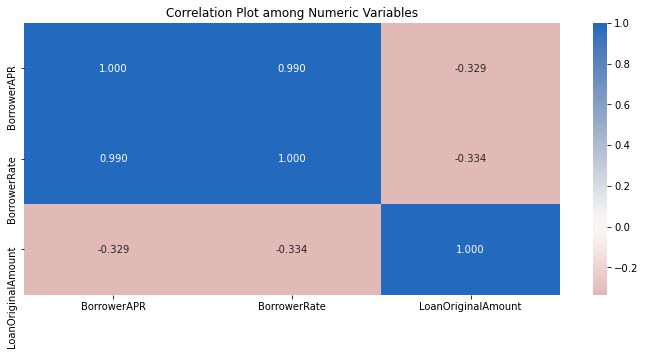

In [22]:
# correlation plot 
plt.figure(figsize = [12, 5])
sb.heatmap(df_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot among Numeric Variables');

Borrower's APR and borrower rate are highly correlated. Both are negatively associated with a loan amount. Given the similarity of the two variables, I would choose one for further analysis. 

2. Explore Relationships among Categorical Variables

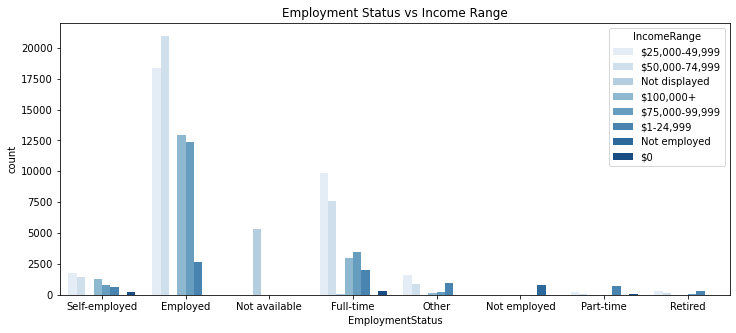

In [23]:
# Employment Status vs. Income Range
plt.figure(figsize = [12, 5])
sb.countplot(data = df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.title('Employment Status vs Income Range');

Employment status and income range appear to be highly correlated. Fully employed enjoy the highest income in general. 

3. Explore relationships between Numeric Variables and Categorical Variables

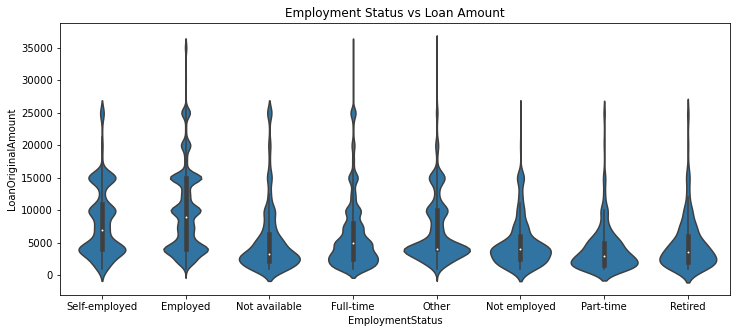

In [24]:
# plot matrix of numeric features against categorical features.
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
ax1 = sb.violinplot(data = df_sub, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color = base_color)
plt.title('Employment Status vs Loan Amount');

 Most borrowers get less than 5K, regardless of their employment status. On the other hand, those who get employed or self-employed seem to be able to secure loans larger than 10K.

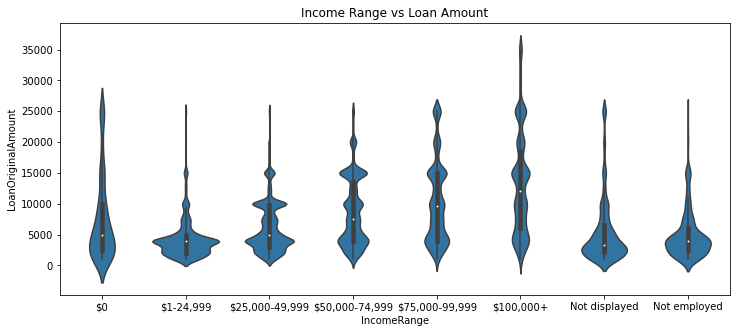

In [25]:
# plot matrix of numeric features against categorical features.
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

income_range = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']
ax1 = sb.violinplot(data = df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color, order = income_range)
plt.title('Income Range vs Loan Amount');

Most borrowers get loan amounts less than 5K.

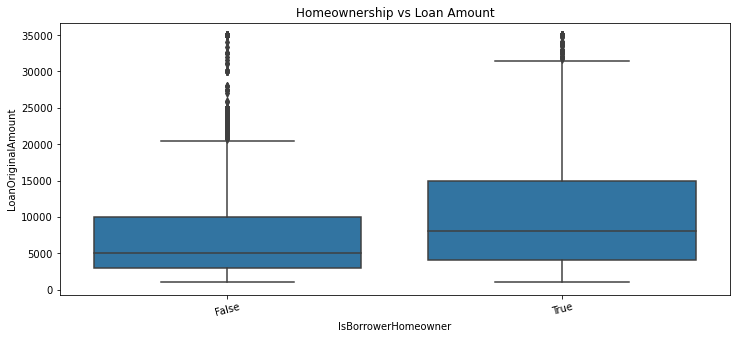

In [26]:
# plot matrix of numeric features against categorical features.
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
ax1 = sb.boxplot(data = df_sub, x = 'IsBorrowerHomeowner', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Homeownership vs Loan Amount');

Homeowners are clearly more likely to secure a higher amount of loan.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- From exploring relationships among numeric variables, I found borrower APR appears to be negatively associated with loan amounts.  That is, the higher the loan amount, the lower borrower APR, and vice versa. 

- From income range and employment status graph, I found that majority of the borrower is employed, and these employed have the highest income. These two variables appear to be highly correlated. 

- From the relationship between employment status and loan amounts, I found most borrowers get less than 5K, regardless of their employment status. On the other hand, those who get employed or self-employed seem to be able to secure loans larger than 10K. 

- I adapted the same plot to check the relationship between income rage and loan amounts. It appears that most borrowers get loan amounts less than 5K. 

- Homeownership appears to be a good differentiator; those with a home are clearly more likely to secure a higher amount of loan. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- These plots are largely fitted into my expectation. However, it appears that some lower-income or unemployed borrowers can still get loans. I suspect those borrowers might have to pay higher interest rates leading to higher borrower APR. Thus, further, investigating how loan status varies across employment status would be interesting. 

- These plots also inform me that income range and employment status deliver similar information. They are also potentially highly correlated. I plan to keep only employment status in the further analysis. 

## Multivariate Exploration

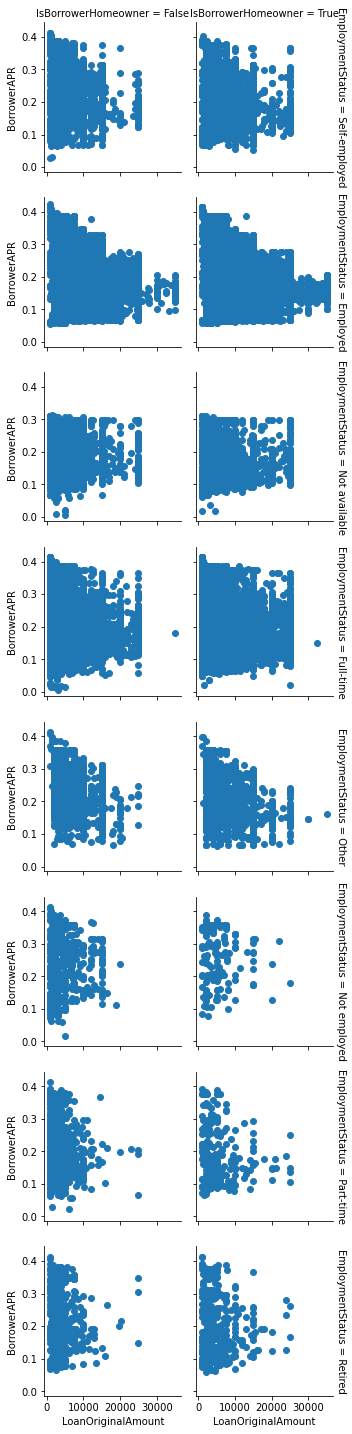

In [27]:
# plot matrix:
g = sb.FacetGrid(data = df_sub, col = 'IsBorrowerHomeowner', row = 'EmploymentStatus', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR');

These four variables seem related but do not yield a clear pattern. I will further investigate later. 

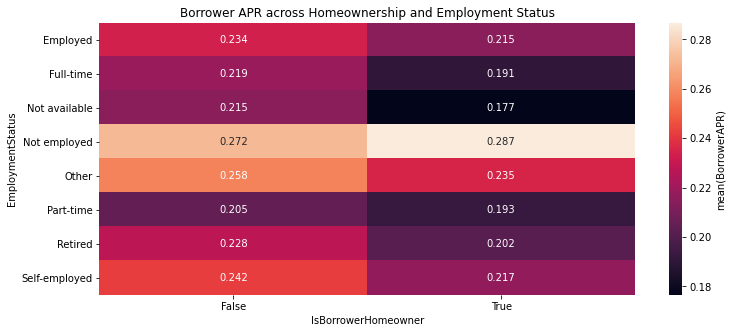

In [28]:
# correlation plot of homeownership, employment status, and borrower APR
plt.figure(figsize = [12, 5])
cat_means = df_sub.groupby(['IsBorrowerHomeowner', 'EmploymentStatus']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'BorrowerAPR_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'IsBorrowerHomeowner',
                            values = 'BorrowerAPR_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Borrower APR across Homeownership and Employment Status');

For those with a home, borrows' APR is the lowest for full-time employed. However, for those without a home, it is one of the highest for full-time employed. 

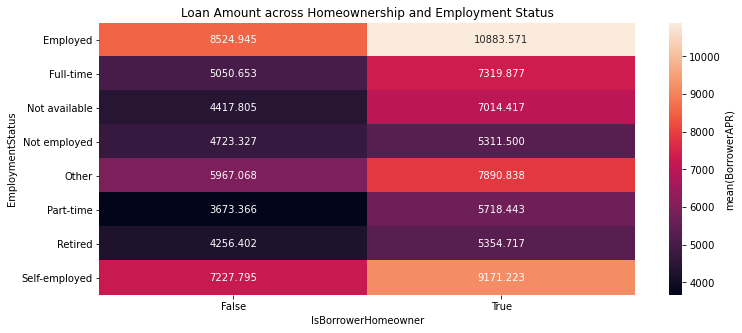

In [29]:
# correlation plot OF homeownership, employment status, and loan amount
plt.figure(figsize = [12, 5])
cat_means = df_sub.groupby(['IsBorrowerHomeowner', 'EmploymentStatus']).mean()['LoanOriginalAmount']
cat_means = cat_means.reset_index(name = 'LoanOriginalAmount_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'IsBorrowerHomeowner',
                            values = 'LoanOriginalAmount_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Loan Amount across Homeownership and Employment Status');

For those with a home, the loan amount is the highest for full-time employed. However, for those who are without a home, the loan amount is still the highest. 

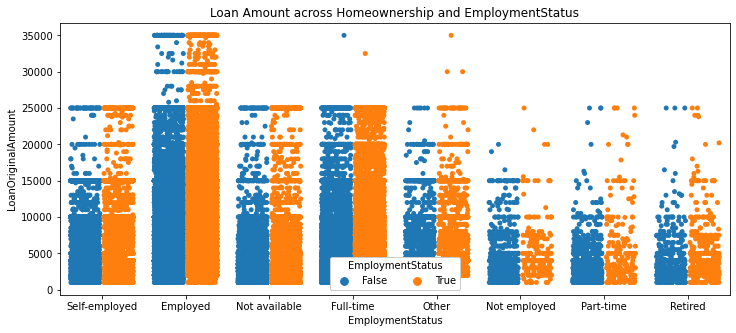

In [30]:
# plot to check how loan amount across homeownership and employment status
plt.figure(figsize = [12, 5])
ax = sb.stripplot(data = df_sub, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
                 jitter=0.35, dodge=True)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'EmploymentStatus')
plt.title('Loan Amount across Homeownership and EmploymentStatus');

The scatterplot shows that borrowers with homes, while full-time employed, are most likely to secure higher amounts of funding. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- I extended my investigation of loan status against borrowers' characteristics by looking at the impact of the three categorical quality features. 

- First, I investigated the relationship among borrowers' APR, homeownership, and employment status. For those with a home, borrows' APR is the lowest for full-time employed. However, for those without a home, it is one of the highest for full-time employed. 

- Second, I investigated the relationship among loan amount, homeownership, and employment status. For those with a home, the loan amount is the highest for full-time employed. However, for those who are without a home, the loan amount is still the highest. 

### Were there any interesting or surprising interactions between features?

- Putting together, it looks like those who are full-time employed and have a home enjoy the highest loan amount as well we the lowest borrower APR. Those who are full-time employed but do not have a home can still secure a higher loan amount but would probably need to pay the highest APR. Controlling for homeownership yields a more nuanced picture of factors related to loan outcomes. 

## Conclusions
- In this analysis, I followed the Question-Visualization-Observations framework to study factors that impact loan outcomes. I expect that employment status, whether a homeowner would have impacts on loan outcomes. Loan amount and borrow APR are used as the two main loan outcome variables.

- My initial expectations were justified by the analysis. Noteworthy, by conducting multivariate analysis, I was able to observe that whether having a home has an impact on loan outcomes across employment status. That is, those who are full-time employed and have a home enjoy the highest loan amount as well we the lowest borrower APR. those who are full-time employed but do not have a home can still secure a higher loan amount but would probably need to pay the highest APR. 